<a href="https://colab.research.google.com/github/vaasu2002/vaasu2002/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>We generally start our code by importing the liberaries which we will throughout the programe.</b>

https://colab.research.google.com/drive/1Q5hK7n-1k4f7sSj0bYxCJW7fXIq8L-kD?usp=sharing

https://colab.research.google.com/drive/1xR97TF4awV2C4s_-wuIk9HH_SGrWYnu1?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import sklearn

<b>Now we will load the data that we will be using to train our model</b>

Here we are using [boston house pricing](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) dataset which is available in the sklearn liberary itself.

In [ ]:
from sklearn.datasets import load_boston
df = load_boston()

In [ ]:
df.keys()  # Returns all the keys of the dataset dictionary

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(df.DESCR)  # Info about the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<b>We convert our dataset into the pandas dataframe, so that it is easier to analyse the data</b>

In [ ]:
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<b>Adding a new column of target values to the dataframe</b>

In [ ]:
boston['MEDV'] = df.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<b>Check if the datset contains any null value or not</b>

In [ ]:
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


> [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) return <b>True</b> or <b>False</b> for each of the cell in the dataframe, but we can't go exploring all the cells to look for True values if any, so we use [sum()](https://www.w3schools.com/python/ref_func_sum.asp) function to count all the cells with True vale (i.e. Null cells)

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<b>As we are to train a linear regression model, let's see the linear correlation between different features of the  dataset.</b>
> For that we use DataFrame's [corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) function and the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from [seaborn](https://seaborn.pydata.org/)

<AxesSubplot:>

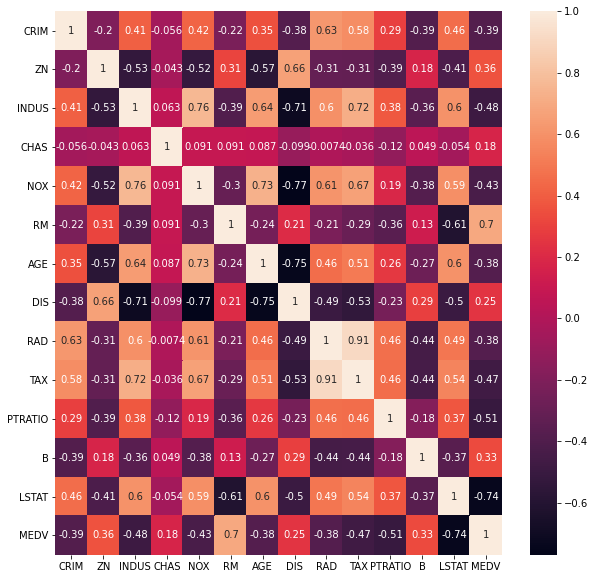

In [ ]:
correlation_matrix = boston.corr()

import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)  # annot = True to print the values inside the square

<b>Let's try to visulaize the variation in price with respect to each of the feature.</b>

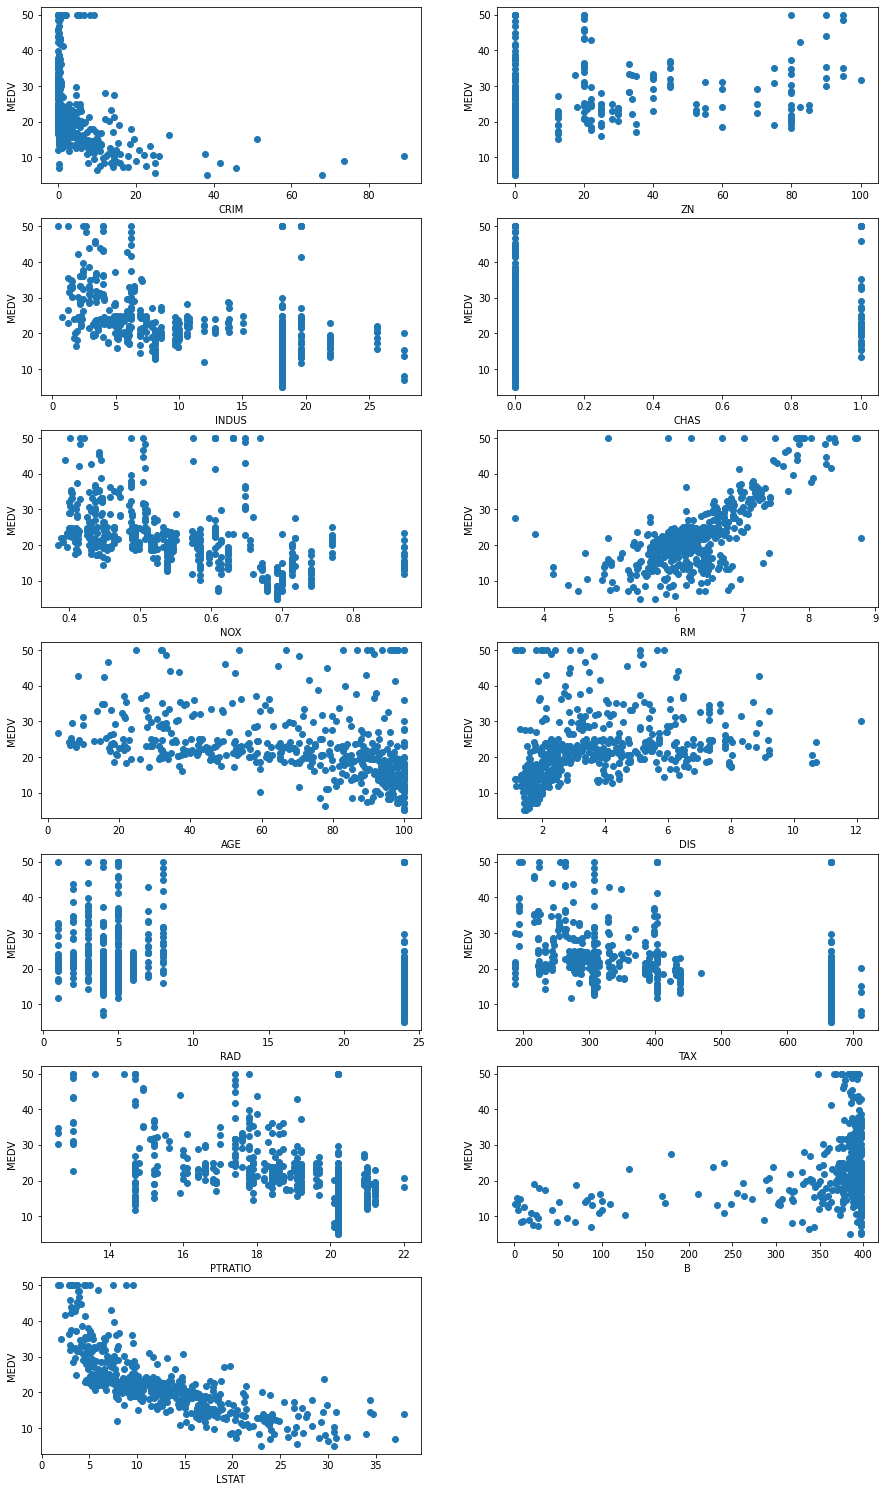

In [ ]:
plt.figure(figsize=(15, 50))  # Setting the size of the figure to be ploted
features = df.feature_names
target = df.target
for i, col in enumerate(features):
    plt.subplot(len(features),2 , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.xlabel(col)
    plt.ylabel('MEDV')

<u><b>OBSERVATIONS</u></b>


*   Variables <b>LSTAT</b> and <b>RM</b> have a hi correlation with the price of the house.
*   <b>INDUS-TAX,  INDUS-DIS, INDUS-NOX, DIS-NOX , AGE-NOX</b>, all these pairs have high correlation between them.



> First try to predict the house price using only the variables that have high linear correlation with the price.

In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


<b>We never train the model on all the data that we have, we always make sure to atleast have a test dataset, which is different from the training dataset.</b>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 2)
(76, 2)
(430,)
(76,)


<b>Now let's import the Linear Regression model from sklearn and train it on the training dataset</b>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()  # Make an instance of the model
lin_model.fit(X_train, Y_train)

LinearRegression()

<b>Now let's make the predictions on the test dataset and look for the error </b>

In [ ]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# on testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 5.596970449422867


The model performance for testing set
RMSE is 5.178451251951529


<b>For the ideal case with 0 error, the plot of actual values to predicted values will follow the equation: <u>y=x</u>, let's see how much out values deviate from the ideal line.</b>

Text(0, 0.5, 'Predicted')

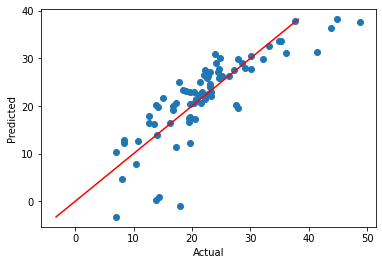

In [ ]:
plt.scatter(Y_test, y_test_predict)

plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)], color='red')
# Ploting a straight line y = x (red in color)
# For the 100% perfect fit, Predicted values will be same as Actual value
# That means for the curve below, y = x line represent 100% fit.

plt.xlabel('Actual')
plt.ylabel('Predicted')

The red line shown represents y=x line (fit with 100% accuracy).

> Now let's try to fit the linear regression model using all the variables

In [ ]:
X = boston.drop('MEDV', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=5)
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# on testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 4.710901797319796


The model performance for testing set
RMSE is 4.687543527902935


Text(0, 0.5, 'Predicted')

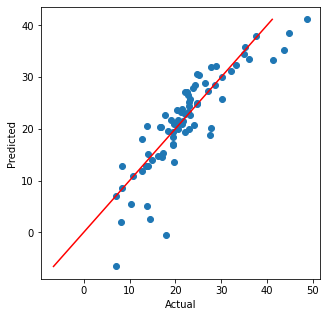

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test, y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<b>Now let's try to fit the data with the variables that dont have a high linear correlation with the price. 
<hr></b> 

> <b>As they don't have a high linear correlation, so try to fit a higher degree equation.</b>

In [ ]:
X = boston.drop(['LSTAT','RM'], axis=1)   # drop the columns with high linear correlation
X

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV
0,0.00632,18.0,2.31,0.0,0.538,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,0.02731,0.0,7.07,0.0,0.469,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,0.02729,0.0,7.07,0.0,0.469,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,0.03237,0.0,2.18,0.0,0.458,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,0.06905,0.0,2.18,0.0,0.458,54.2,6.0622,3.0,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,69.1,2.4786,1.0,273.0,21.0,391.99,22.4
502,0.04527,0.0,11.93,0.0,0.573,76.7,2.2875,1.0,273.0,21.0,396.90,20.6
503,0.06076,0.0,11.93,0.0,0.573,91.0,2.1675,1.0,273.0,21.0,396.90,23.9
504,0.10959,0.0,11.93,0.0,0.573,89.3,2.3889,1.0,273.0,21.0,393.45,22.0


<b>For making the featues of higher degree, we use [PolynomialFeture](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) function from sklearn</b>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
x_poly = poly.fit_transform(X.drop('MEDV', axis=1))

<hr><hr><hr>
<b>Let's first see how this PolynomialFeature function works...</B>

In [ ]:
arr = [[0,1,2]]
arr = np.asarray(arr)
pol = PolynomialFeatures(degree=2, include_bias=False)
arr_poly = pol.fit_transform(arr)
arr_poly

array([[0., 1., 2., 0., 0., 0., 1., 2., 4.]])

The output arr_pol is actually: [0,  1,  2,  0^2,  0X1,  0X2,  1^2,  1X2,  2^2]

In [ ]:
# In case of multiple rows, the same operation as above is applied to all the rows seperately
arr = [[0,1,2],[1,2,3]]
arr = np.asarray(arr)
arr

array([[0, 1, 2],
       [1, 2, 3]])

In [ ]:
pol = PolynomialFeatures(degree=2, include_bias=False)
arr_poly = pol.fit_transform(arr)
arr_poly

array([[0., 1., 2., 0., 0., 0., 1., 2., 4.],
       [1., 2., 3., 1., 2., 3., 4., 6., 9.]])

In [ ]:
pol = PolynomialFeatures(degree=2, include_bias=True) #BIAS TRUE MEANS INCLUDE 0 DEGREE VALUES
arr_poly = pol.fit_transform(arr)
arr_poly

array([[1., 0., 1., 2., 0., 0., 0., 1., 2., 4.],
       [1., 1., 2., 3., 1., 2., 3., 4., 6., 9.]])

>As we added bias in the polynomial feature, the extra 0 degree term (which is 1 (anything to the power 0 is 1) has been added in the polynomial array.

<hr><hr><hr>
<b>Now let's continue with the original code</B>

In [ ]:
# Spliting the dataset into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(x_poly, Y, test_size = 0.15, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 78)
(76, 78)
(430,)
(76,)


In [ ]:
lin_model = LinearRegression()   # Making the instance of the model
lin_model.fit(X_train, Y_train)  # Training the model on the training dataset

LinearRegression()

<b>Making the predictions and seeing the accuracy of the model</b>

In [ ]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# on testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


Text(0, 0.5, 'Predicted')

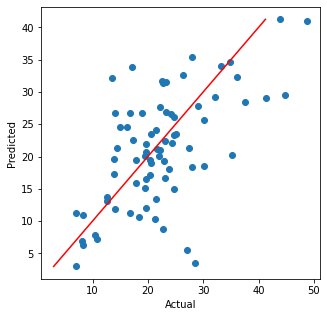

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test, y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')